### 【問題1】データの可視化
```
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。
この断面図を見れば低い場所はすぐに分かりますが、今回は暗闇の中で足元の勾配のみが知れるという状況を想像します。
```

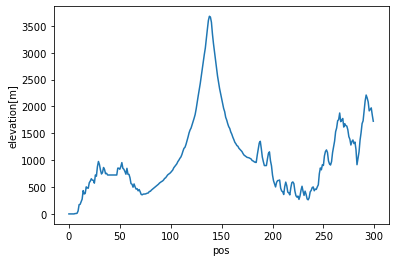

In [40]:
import numpy as np
csv_path = "./mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
# 「その地点の番号」「緯度」「経度」「標高」「地点0からの距離」
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

import matplotlib.pyplot as plt
plt.xlabel("pos")
plt.ylabel("elevation[m]")
plt.plot(fuji[:, 0],  fuji[:, 3])
plt.show()

### 【問題2】ある地点の勾配を計算する関数を作成
```
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。
しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。
「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。
勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。
```

In [41]:
def calc_gra(x, y, idx):
    if idx < 0 or len(x-1) < idx:
        print(f"x: {len(x)} y: {len(y)} idx: {idx}")
        raise
    return  (y[idx] - y[idx-1]) / (x[idx] - x[idx-1])

x_list =fuji[:, 0]
y_list = fuji[:, 3]
print(calc_gra(x_list, y_list, 120))

36.419999999999845


### 【問題3】移動先の地点を計算する関数を作成
```
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。
```

In [42]:
def next_pos(x, y, idx, learning_rate=0.2):
    if idx < 1 or len(x) < idx:
        return idx
    gradient = calc_gra(x, y, idx)
    return round(idx - learning_rate * gradient)

print(next_pos(x_list, y_list, 70))

78


### 【問題4】山を下る関数を作成
```
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の戻り値としてください。
最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。
《実装上の注意》
問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。
```

In [43]:
current_idx = 136
idx_hists = np.array([current_idx])
while True:
    next_idx = next_pos(x_list, y_list, current_idx)
    if next_idx == current_idx:
        break
    current_idx = next_idx
    idx_hists = np.append(idx_hists, next_idx)
print(idx_hists)

[136 102  98  95  93  89  85  82  79  73  70  78  77  75]


### 【問題5】下山過程の可視化
```
問題4における下山過程をMatplotlibを使いグラフで可視化してください。
《可視化例》
断面図の中に移動した地点を点で表示する
繰り返し毎の標高や勾配を折れ線グラフにする
```

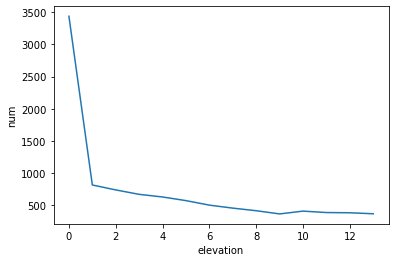

In [44]:
heights = np.array([], dtype=np.int64)
gras = np.array([], dtype=np.float64)

for i in idx_hists:
    heights = np.append(heights, fuji[i][3])
    gras = np.append(gras, calc_gra(x_list, y_list, i))

# 標高の棒グラフ
plt.xlabel("elevation")
plt.ylabel("num")
plt.plot(range(len(heights)), heights)
plt.show()

### 【問題6】初期値の変更
```
問題4では最初の「今いる地点」を136と固定しましたが、これを他の全ての点で計算してください。
具体的には、「今いる地点」を変更できるようにするということです。
```

In [45]:
def calc_gradient_descent(init_idx, learning_rate=0.2):
    current_idx = init_idx
    idx_hists = np.array([current_idx])
    count = 0
    while True:
        next_idx = next_pos(x_list, y_list, current_idx, learning_rate)
        if next_idx == current_idx or 20 < count:
            break
        current_idx = next_idx
        idx_hists = np.append(idx_hists, next_idx)
        count += 1
    return idx_hists

for i in range(1, len(fuji), 1):
    print(calc_gradient_descent(i))

[1]
[2]
[3]
[4]
[5]
[6 5]
[7]
[8 7]
[9 1]
[ 10 -13]
[ 11  10 -13]
[12  2]
[13  4]
[ 14 -18]
[15 27 31 51 41]
[ 16  14 -18]
[17 -8]
[18 22 13  4]
[19 21 15 27 31 51 41]
[20 -1]
[21 15 27 31 51 41]
[22 13  4]
[23 28 -8]
[24]
[25 36 52 37 35 43]
[26 -4]
[27 31 51 41]
[28 -8]
[ 29  10 -13]
[30 41]
[31 51 41]
[32 47]
[33 27 31 51 41]
[34 15 27 31 51 41]
[35 43]
[36 52 37 35 43]
[37 35 43]
[38 44]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48 22 13  4]
[49]
[50 54 58 80]
[51 41]
[52 37 35 43]
[53 74]
[54 58 80]
[55 63 74]
[56 66 74]
[57 35 43]
[58 80]
[59]
[60 73 70 78 77 75]
[61 83 80]
[62 64 52 37 35 43]
[63 74]
[64 52 37 35 43]
[65 76 75]
[66 74]
[67 66 74]
[68 76 75]
[69 64 52 37 35 43]
[70 78 77 75]
[71 81 77 75]
[72 73 70 78 77 75]
[73 70 78 77 75]
[74]
[75]
[76 75]
[77 75]
[78 77 75]
[79 73 70 78 77 75]
[80]
[81 77 75]
[82 79 73 70 78 77 75]
[83 80]
[84 81 77 75]
[85 82 79 73 70 78 77 75]
[86 83 80]
[87 84 81 77 75]
[88 85 82 79 73 70 78 77 75]
[89 85 82 79 73 70 78 77 75]
[90 87 8

### 【問題7】初期値ごとの下山過程の可視化
```
問題6では全初期値の下山過程を計算しました。そこで、いくつかの初期値に対して
どのような下山過程となるか、問題5のように可視化してください。勾配降下法において
初期値 が結果に影響を与えることが確認できます。
《初期値とは》
今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。
例えば136と142では富士山の異なる斜面を下ることになります。
```

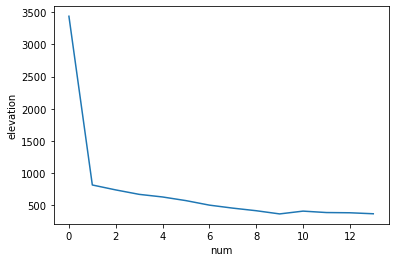

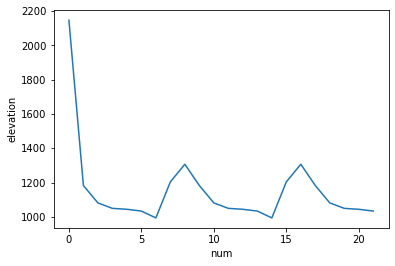

In [46]:
heights1 = [fuji[i][3] for i in calc_gradient_descent(136)]
heights2 = [fuji[i][3] for i in calc_gradient_descent(150)]
# 標高の棒グラフ
plt.xlabel("num")
plt.ylabel("elevation")
plt.plot(range(len(heights1)), heights1)
plt.show()
plt.xlabel("num")
plt.ylabel("elevation")
plt.plot(range(len(heights2)), heights2)
plt.show()

### 【問題8】（アドバンス問題）ハイパーパラメータの変更
```
ハイパーパラメータ $\alpha$ を変化させるとどのような下山過程となるか、
問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。
```

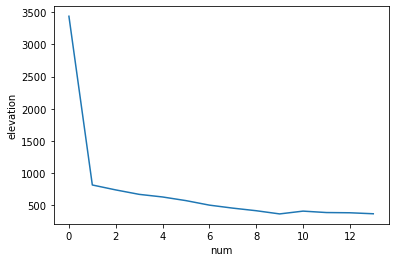

In [49]:
heights3 = [fuji[i][3] for i in calc_gradient_descent(136, learning_rate=0.2)]
plt.xlabel("num")
plt.ylabel("elevation")
plt.plot(range(len(heights3)), heights3)
plt.show()

In [15]:
hoge = def hoge():
    print("hoge")

hoge = 123    

fuga = "fuga"
piyo = 1



display(type(hoge))
display(type(fuga))
display(type(piyo))



SyntaxError: invalid syntax (<ipython-input-15-eb06c1a384f2>, line 1)